In [1]:
from tensorflow.keras.datasets import mnist
import cv2, sys, os, glob, random, numpy as np
import matplotlib.pyplot as plt

In [2]:
print(os.getcwd())
print(os.listdir('.\images'))

C:\workspace\python\Testing
['0.jpg', '1.jpg', '10.jpg', '11.jpg', '12.jpg', '13.jpg', '14.jpg', '2.jpg', '3.jpg', '4.jpg', '5.jpg', '6.jpg', '7.jpg', '8.jpg', '9.jpg']


In [3]:
test = cv2.imread('.\images\9.jpg')
test =cv2.cvtColor(test, cv2.COLOR_BGR2RGB)
test

array([[[227, 238, 244],
        [228, 239, 245],
        [229, 238, 245],
        ...,
        [233, 242, 249],
        [233, 242, 249],
        [233, 242, 249]],

       [[230, 237, 245],
        [230, 237, 245],
        [231, 238, 246],
        ...,
        [233, 240, 248],
        [232, 241, 248],
        [232, 241, 248]],

       [[230, 237, 245],
        [230, 237, 245],
        [230, 237, 245],
        ...,
        [232, 241, 248],
        [232, 241, 248],
        [232, 241, 248]],

       ...,

       [[ 94, 106, 106],
        [ 93, 103, 104],
        [ 97, 105, 107],
        ...,
        [145, 140, 121],
        [143, 138, 119],
        [143, 138, 119]],

       [[ 91,  99, 101],
        [ 91,  99, 101],
        [ 90,  95,  98],
        ...,
        [132, 124, 105],
        [133, 124, 107],
        [132, 123, 106]],

       [[ 86,  98,  98],
        [ 88,  98,  99],
        [ 89,  97,  99],
        ...,
        [137, 130, 112],
        [138, 130, 111],
        [139, 131, 112]]

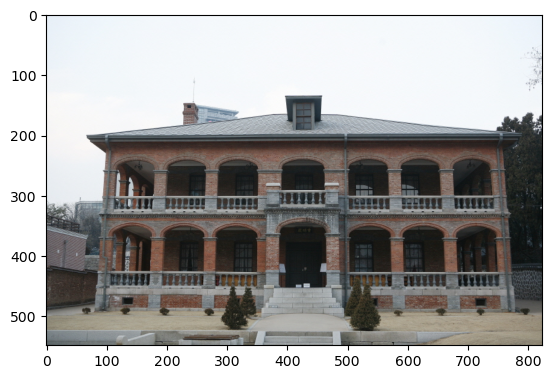

In [4]:
plt.imshow(test)

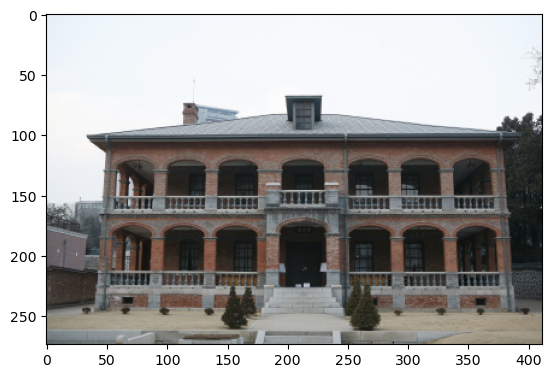

In [5]:
test1 = cv2.resize(test, dsize=(0,0), fx=0.5, fy=0.5, interpolation=cv2.INTER_LINEAR) 
plt.imshow(test1)

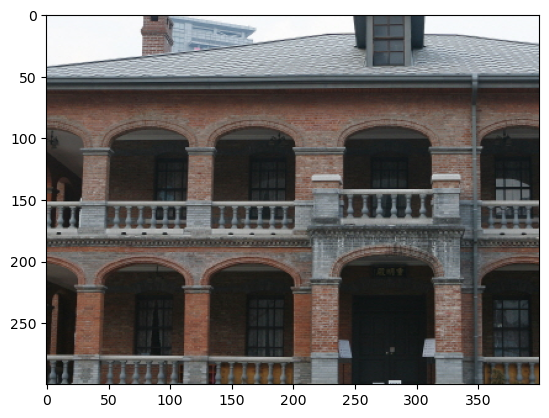

In [6]:
import tensorflow as tf
test2 = tf.image.crop_to_bounding_box(test, 150, 150, 300, 400)
plt.imshow(test2)

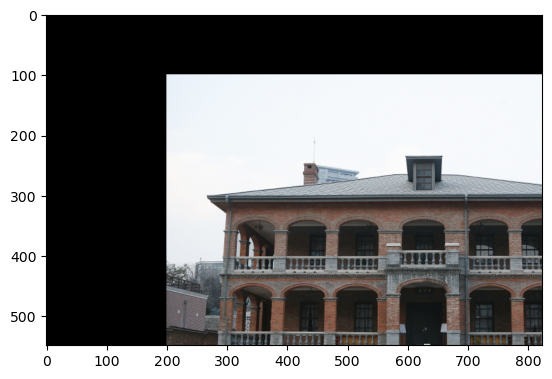

In [7]:
r, c, ch = test.shape
m = np.float32([[1,0,200],[0,1,100]]) 
test3 = cv2.warpAffine(test, m, (c,r))

plt.imshow(test3)

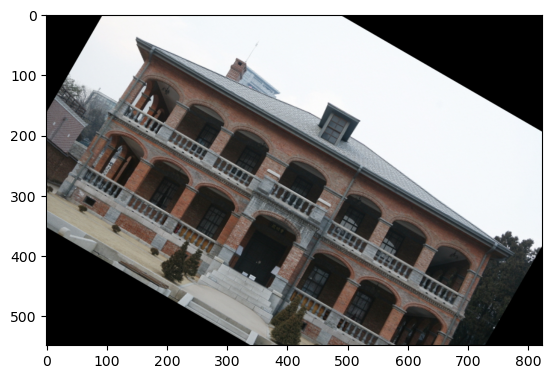

In [8]:
M = cv2.getRotationMatrix2D((c/2, r/2), -30, 1) 

test8 = cv2.warpAffine(test, M, (c,r))

plt.imshow(test8)

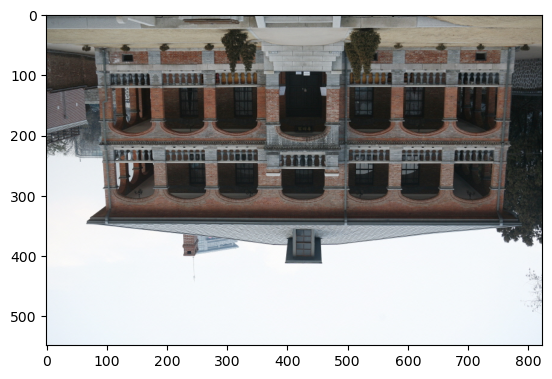

In [9]:
test4 = cv2.flip(test, 0)
plt.imshow(test4)

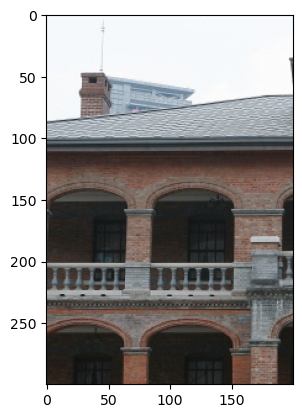

In [10]:
import tensorflow as tf
test9 = tf.image.crop_to_bounding_box(test, 100, 200, 300, 200) 
plt.imshow(test9)

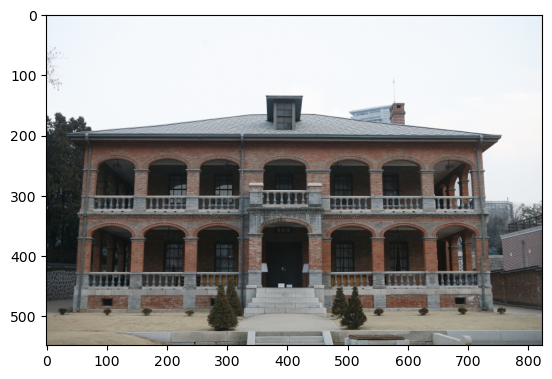

In [11]:
# 좌우 대칭
test5 = cv2.flip(test, 1)
plt.imshow(test5)

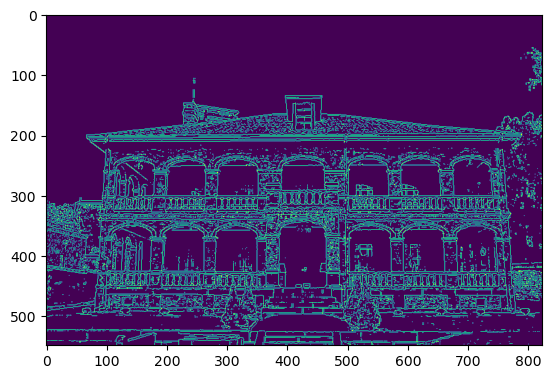

In [12]:
test6 = cv2.Canny(test, 100, 100)
plt.imshow(test6)

In [21]:
img_list = glob.glob('.\images\*.jpg') 
img_list

['.\\images\\0.jpg',
 '.\\images\\1.jpg',
 '.\\images\\10.jpg',
 '.\\images\\11.jpg',
 '.\\images\\12.jpg',
 '.\\images\\13.jpg',
 '.\\images\\14.jpg',
 '.\\images\\2.jpg',
 '.\\images\\3.jpg',
 '.\\images\\4.jpg',
 '.\\images\\5.jpg',
 '.\\images\\6.jpg',
 '.\\images\\7.jpg',
 '.\\images\\8.jpg',
 '.\\images\\9.jpg']

In [19]:
from tensorflow.keras.datasets import mnist
import cv2, sys, os, glob, random, numpy as np
import matplotlib.pyplot as plt

def change_img(a):
    row, col, cha = a.shape
    rotate = random.randint(0, 360)
    x_move = random.randint(-150,200)
    y_move = random.randint(-100,100)
    x_cut = random.randint(250,450)
    y_cut = random.randint(200,300)
    
    #이동
    m = np.float32([[1,0,x_move],[0,1,y_move]]) 
    a = cv2.warpAffine(a, M, (col,row))
    
    #접기
    a = cv2.flip(a, 0)
    
    #회전
    m1 = cv2.getRotationMatrix2D((col/2, row/2), rotate, 1) 
    a = cv2.warpAffine(a, m1, (col,row))
    
    #자르기
    a = tf.image.crop_to_bounding_box(a, 100, 100, x_cut, y_cut)
    
    #흐리게
    #a = cv2.blur(a, (20, 20)) 
    
    return a


for z in img_list:
    img = cv2.imread(z)
    re_img =change_img(img)
    
    def file_name(b):
        name = b.split('\\').split('.')[0]
        return name
    
    result_name=file(z)
    cv2.imwrite('re'+name, re_img)
    print('u')
#plt.imshow(re_img)
  
    

AttributeError: 'NoneType' object has no attribute 'shape'

In [ ]:
def change_img(a):
    row, col, cha = a.shape
    rotate = random.randint(0, 360)
    x_move = random.randint(-150,200)
    y_move = random.randint(-100,100)
    x_cut = random.randint(250,450)
    y_cut = random.randint(200,300)
    
    #이동
    m = np.float32([[1,0,x_move],[0,1,y_move]]) 
    a = cv2.warpAffine(a, M, (col,row))
    
    #접기
    a = cv2.flip(a, 0)
    
    #회전
    m1 = cv2.getRotationMatrix2D((col/2, row/2), rotate, 1) 
    a = cv2.warpAffine(a, m1, (col,row))
    
    #자르기
    a = tf.image.crop_to_bounding_box(a, 100, 100, x_cut, y_cut)
    
    #흐리게
    #a = cv2.blur(a, (20, 20)) 
    
    return a

In [23]:
def file(b):
    name = b.split('\\')[-1]
    return name
for x in img_list:
    print(file(x))
   

0.jpg
1.jpg
10.jpg
11.jpg
12.jpg
13.jpg
14.jpg
2.jpg
3.jpg
4.jpg
5.jpg
6.jpg
7.jpg
8.jpg
9.jpg


In [ ]:
for x in img_list:
    img = cv2.imread(x)
    img=change(img)
    

In [40]:
import random
import cv2
import tensorflow as tf
import numpy as np

def change_img(a):
    #row, col, cha = a.shape
    rotate = random.randint(0, 360)
    x_move = random.randint(-150, 200)
    y_move = random.randint(-100, 100)
    x_cut = random.randint(250, 450)
    y_cut = random.randint(200, 300)

    # 이동
    M = np.float32([[1, 0, x_move], [0, 1, y_move]])
    a = cv2.warpAffine(a, M, (col, row))

    # 접기
    a = cv2.flip(a, 0)

    # 회전
    m1 = cv2.getRotationMatrix2D((col / 2, row / 2), rotate, 1)
    a = cv2.warpAffine(a, m1, (col, row))

    # 자르기
    a = tf.image.crop_to_bounding_box(a, 100, 100, x_cut, y_cut)

    # 흐리게
    # a = cv2.blur(a, (20, 20))

    return a

img_list = glob.glob('.\images\*.jpg') 

for z in img_list:
    img = cv2.imread(z)
    row, col, cha = img.shape
    re_img = change_img(img)

    
    result_name = file_name(z)
    cv2.imwrite('re_'+result_name, re_img)

def file_name(b):
        name = b.split('\\')[2]
        return name


error: OpenCV(4.8.1) :-1: error: (-5:Bad argument) in function 'imwrite'
> Overload resolution failed:
>  - img is not a numpy array, neither a scalar
>  - Expected Ptr<cv::UMat> for argument 'img'


In [27]:
img_list = glob.glob('.\images\*.jpg') 

for z in img_list:
    img = cv2.imread(z)
img

array([[[244, 238, 227],
        [245, 239, 228],
        [245, 238, 229],
        ...,
        [249, 242, 233],
        [249, 242, 233],
        [249, 242, 233]],

       [[245, 237, 230],
        [245, 237, 230],
        [246, 238, 231],
        ...,
        [248, 240, 233],
        [248, 241, 232],
        [248, 241, 232]],

       [[245, 237, 230],
        [245, 237, 230],
        [245, 237, 230],
        ...,
        [248, 241, 232],
        [248, 241, 232],
        [248, 241, 232]],

       ...,

       [[106, 106,  94],
        [104, 103,  93],
        [107, 105,  97],
        ...,
        [121, 140, 145],
        [119, 138, 143],
        [119, 138, 143]],

       [[101,  99,  91],
        [101,  99,  91],
        [ 98,  95,  90],
        ...,
        [105, 124, 132],
        [107, 124, 133],
        [106, 123, 132]],

       [[ 98,  98,  86],
        [ 99,  98,  88],
        [ 99,  97,  89],
        ...,
        [112, 130, 137],
        [111, 130, 138],
        [112, 131, 139]]

In [48]:
import random
import cv2
import tensorflow as tf
import numpy as np

class Re_data:
    def __init__(self, img_list):
        self.img_list = img_list

    def change_img(self, a):
        rotate = random.randint(0, 360)
        x_move = random.randint(-150, 200)
        y_move = random.randint(-100, 100)
        x_cut = random.randint(250, 450)
        y_cut = random.randint(200, 300)

        M = np.float32([[1, 0, x_move], [0, 1, y_move]])
        a = cv2.warpAffine(a, M, (self.col, self.row))

        a = cv2.flip(a, 0)

        m1 = cv2.getRotationMatrix2D((self.col / 2, self.row / 2), rotate, 1)
        a = cv2.warpAffine(a, m1, (self.col, self.row))

        a = tf.image.crop_to_bounding_box(a, 100, 100, x_cut, y_cut)

        return a

    #@staticmethod
    def file_name(b):
        name = b.split('\\')[2]
        return name
    
    def imdata(self):
        for z in self.img_list:
            img = cv2.imread(z)
            self.row, self.col, self.cha = img.shape
            re_img = self.change_img(img)

            result_name = self.file_name(z)
            cv2.imwrite('re_'+result_name , re_img)
           



In [52]:
img_list = glob.glob('.\images\*.jpg')
Re_data(img_list)